### Introduction

##### Purpose of the Notebook:


Visualize the IMDB Rating of all Winnie the Pooh TV and Cinema productions.

### 1. Imports
##### 1.1 Import libraries and write settings.

In [1]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings("ignore")

# Standard Plotting - Matplotlib
import matplotlib.pyplot as plt
import matplotlib as mpl

import matplotlib.patheffects as path_effects
def path_effect_stroke(**kwargs):
    return [path_effects.Stroke(**kwargs), path_effects.Normal()]

# increases resolution of plots
%config InlineBackend.figure_format = "retina"
%matplotlib inline

import glob

In [2]:
files = glob.glob('*.xlsx')

In [3]:
dfs = []

for file in files:
    dfs.append(pd.read_excel(file, usecols='A:H'))

df = pd.concat(dfs, axis=0).reset_index(drop=True)

In [4]:
def get_bbox_bounds(bbox_array):
    """
    returns the x, y, width and height of a bounding box object
    
    """
    x = bbox_array[0, 0]
    y = bbox_array[0, 1]
    width, height = np.diff(bbox_array, axis=0)[0]
    return (x, y, width, height)

def bbox_axes_inset(obj, fig=None, zorder=-1, axis='off'):
    """
    for a matplotlib object that has the get_window_extent function
    add another axes to the figure in the position and extent of obj
    
    by default sets the axis zorder to -1
    and turns the axis 'off'
    
    Parameters:
    ----------
    obj : a matplotlib object with the get_window_extent function
    fig = None : a plt.figure object
    zorder = -1 : float 
    axis = 'off' : bool or str - see help(plt.axis) for possible values
    
    """
    fig = fig or plt.gcf()

    # bounding box of the object | Axes Coordinates
    win_ext = obj.get_window_extent(renderer=fig.canvas.get_renderer())
    
    ax_inset = fig.add_axes(get_bbox_bounds(fig.transFigure.inverted().transform(win_ext)))
    
    ax_inset.set_zorder(zorder)
    ax_inset.axis(axis)
    
    return ax_inset

### 2. Creating the Visualization

In [5]:
import themepy
from themepy.helper import get_rcparams_containing
from highlight_text import HighlightText, fig_text, ax_text

# I set matplotlibs rcParams with the help of themepy and saved the theme locally.
# It is part of this repository. Copy it into `themepy/themepy/themes/` after cloning / downloading themepy.
theme = themepy.Theme('winnie_the_pooh_xkcd')

# To create more of a playful vibe to go along with the xkcd style I will also use handdrawn circle markers.
marker = np.loadtxt('Handrawn_Circle.gz')

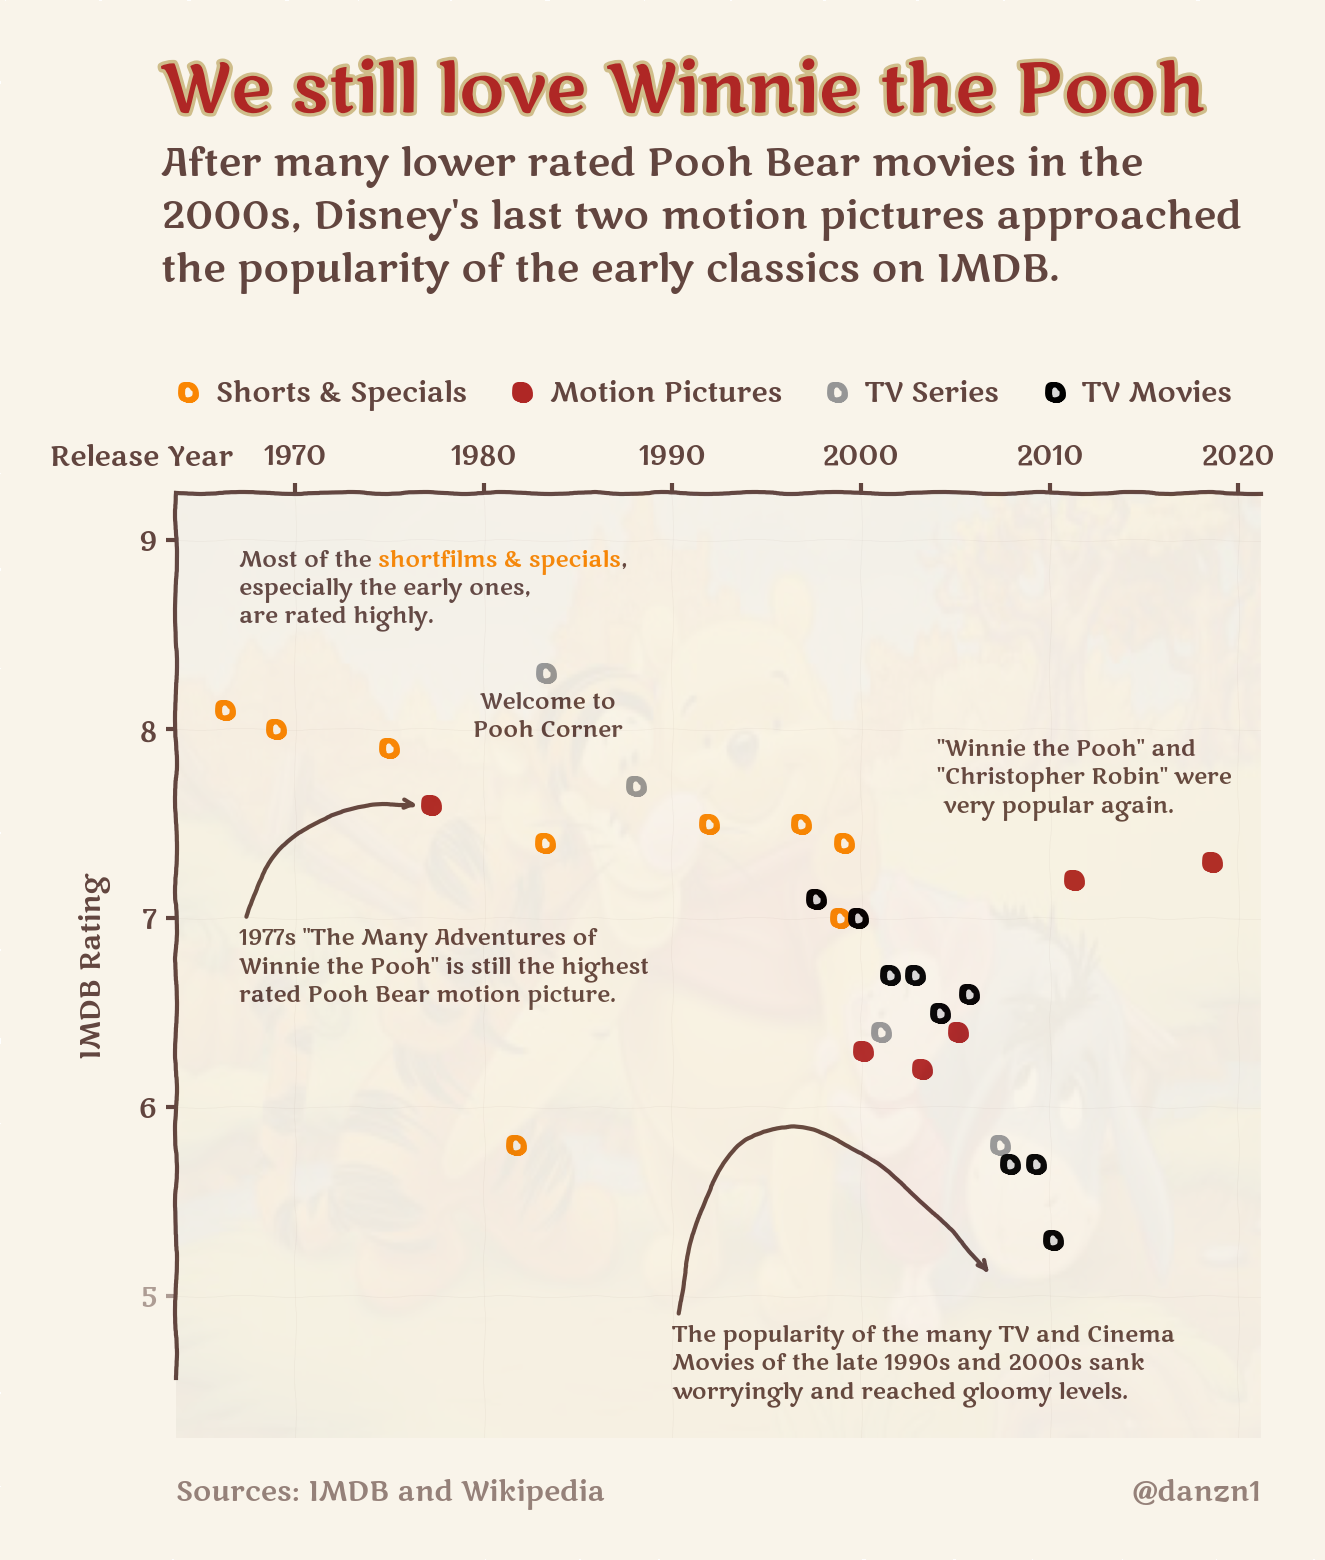

In [9]:
fig, (ax_title, ax) = plt.subplots(2,1, figsize = (7, 9), gridspec_kw={'height_ratios': [0.25, 0.75]})

ax_title.axis('off')

ax.scatter(df.loc[df['Type'] == 'Short', 'Release'], df.loc[df['Type'] == 'Short', 'IMDB Rating'],
            facecolor=fig.get_facecolor(), edgecolor='C5', label='Shorts & Specials', zorder=9, marker=marker)

ax.scatter(df.loc[df['Type'] == 'Movie', 'Release'], df.loc[df['Type'] == 'Movie', 'IMDB Rating'],
            edgecolor='C1', facecolor='C1', label='Motion Pictures', zorder=9, marker=marker)

ax.scatter(df.loc[df['Type'] == 'TV Series', 'Release'], df.loc[df['Type'] == 'TV Series', 'IMDB Rating'],
            facecolor=fig.get_facecolor(), edgecolor='C3', label='TV Series', zorder=9, marker=marker)

ax.scatter(df.loc[df['Type'] == 'TV Movie', 'Release'], df.loc[df['Type'] == 'TV Movie', 'IMDB Rating'],
            edgecolor='k', facecolor='C2', label='TV Movies', zorder=9, marker=marker)


ax.legend(ncol=4, loc=(-0.025, 1.075), scatteryoffsets=[0.5])

ax.set_ylabel('IMDB Rating')

title = fig_text(x=0.5, y=0.875,
                 s="<We still love Winnie the Pooh>\n"
                   "After many lower rated Pooh Bear movies in the\n"
                   "2000s, Disney's last two motion pictures approached\n"
                   "the popularity of the early classics on IMDB.",
                 highlight_textprops=[{'fontsize': 25, 'color': '#af2725', 'path_effects': path_effect_stroke(linewidth=2.5, foreground='#cfbd8a')}],
                 va='top', ha='center', fontsize=14, ax=ax, zorder=99)

anno_fontsize = 8

text = ax_text(x=pd.Timestamp('1967-01-01'), y=8.95, fontsize=anno_fontsize,
                s='Most of the <shortfilms & specials>,\nespecially the early ones,\nare rated highly.',
                highlight_textprops=[{'color': 'C5'}],
                vsep=1,
                va='top')

ax.annotate(xy=df.loc[df.Title == 'Welcome to Pooh Corner', ['Release', 'IMDB Rating']].values[0],
            xytext=(pd.Timestamp('1983-06-01'), 8.2),
            s='Welcome to\nPooh Corner', fontsize=anno_fontsize, va='top', ha='center')

ax.annotate(xy=df.loc[df.Title == 'The Many Adventures of Winnie the Pooh', ['Release', 'IMDB Rating']].values[0]-[pd.Timedelta('150days'), 0],
            xytext=(pd.Timestamp('1967-01-01'), 6.95), fontsize=anno_fontsize,
            s='1977s "The Many Adventures of\nWinnie the Pooh" is still the highest\nrated Pooh Bear motion picture.',
            va='top', arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=-0.5", relpos=(0, 0.5), color='C0'))

ax.annotate(xy=df.loc[df.Title == 'Christopher Robin', ['Release', 'IMDB Rating']].values[0],
            xytext=(pd.Timestamp('2004-01-01'), 7.95), fontsize=anno_fontsize,
            s='"Winnie the Pooh" and\n"Christopher Robin" were\n very popular again.', va='top')

ax.annotate(xy=(pd.Timestamp('2007-01-01'), 5.1),#(pd.Timestamp('1998-01-01'), 6.25),
            xytext=(pd.Timestamp('1990-01-01'), 4.85), fontsize=anno_fontsize,
            s='The popularity of the many TV and Cinema\nMovies of the late 1990s and 2000s sank\nworryingly and reached gloomy levels.',
            va='top', arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=-1.25", relpos=(0, 0.25), color='C0'))

fig.text(x=0.125, y=0.075, s='Sources: IMDB and Wikipedia', color='C0', alpha=0.66)
fig.text(x=0.9, y=0.075, s='@danzn1', color='C0', alpha=0.66, ha='right')

ax.set_ylim(4.25, 9.25)

inset = bbox_axes_inset(ax, zorder=0)
img=plt.imread('winnie_the_pooh.jpg')
inset.imshow(img, alpha=0.05, extent=[0, 1, 0, 1], aspect='auto')

fig.text(x=0.035, y=0.65, s='Release Year', color='C0', fontsize=10, clip_on=False)

ax.yaxis.get_ticklabels()[1].set_alpha(0.5)
ax.yaxis.get_ticklines()[2].set_alpha(0.5)
ax.spines['left'].set_bounds(4.57, 9.25)

plt.show()

fig.savefig('Winnie_the_Pooh_xkcd.png')